In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGsLvXbsGzaXdYwCveMJLqQMownnm0WoxKbg&s

/bin/bash: line 1: s: command not found
--2024-11-27 21:04:38--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGsLvXbsGzaXdYwCveMJLqQMownnm0WoxKbg
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 172.253.117.139, 172.253.117.101, 172.253.117.102, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|172.253.117.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5429 (5.3K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcSGsLvXbsGzaXdYwCveMJLqQMownnm0WoxKbg’

images?q=tbn:ANd9Gc 100%[===================>]   5.30K  --.-KB/s    in 0s      

2024-11-27 21:04:38 (51.1 MB/s) - ‘images?q=tbn:ANd9GcSGsLvXbsGzaXdYwCveMJLqQMownnm0WoxKbg’ saved [5429/5429]



In [ ]:
colored_image = plt.imread('steve.jpeg')

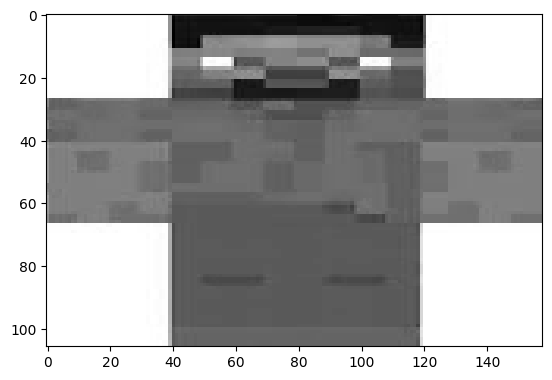

In [ ]:
plt.imshow(colored_image)
plt.imshow(np.dot(colored_image[:: 3],[1,1,1]),cmap='gray')

In [ ]:
gr_img=np.zeros((colored_image.shape[0],colored_image.shape[1]))
for i in range(colored_image.shape[0]):
  for j in range(colored_image.shape[1]):
    gr_img[i,j] = np.mean(colored_image[i,j])

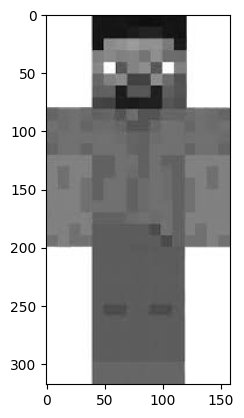

In [ ]:
plt.imshow(gr_img,cmap
          ='gray')

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/ymattu/fashion-mnist-csv/refs/heads/master/fashion_train.csv')
labels=df['y']
df.drop(columns=['y'],inplace=True

        )

In [ ]:
images=[]
labels_arr=[]
for _,row in df.iterrows():
    images.append(np.reshape(np.array(row),(28,28)))
for label in labels:
  labels_arr.append(label)

In [ ]:
import random

In [ ]:
def randimg():
  return random.choice(images)

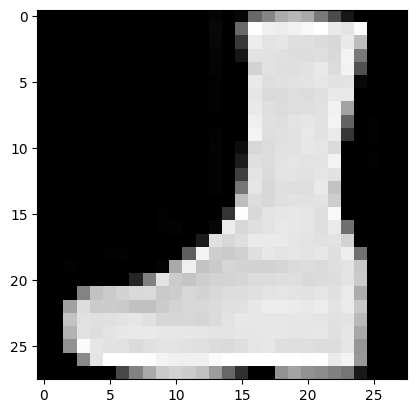

In [ ]:
plt.imshow(randimg(),cmap='gray')

In [ ]:
def plot2imgs(img1,img2):
  fig,axes=plt.subplots(2)
  axes[0].imshow(img1,cmap='gray')

  axes[1].imshow(img2,cmap='gray')

In [ ]:
def plot_images(img_arr):
  fig,axes=plt.subplots(1,len(img_arr),figsize=(15,5))
  for i in range(len(img_arr)):
    axes[i].imshow(img_arr[i],cmap='gray')


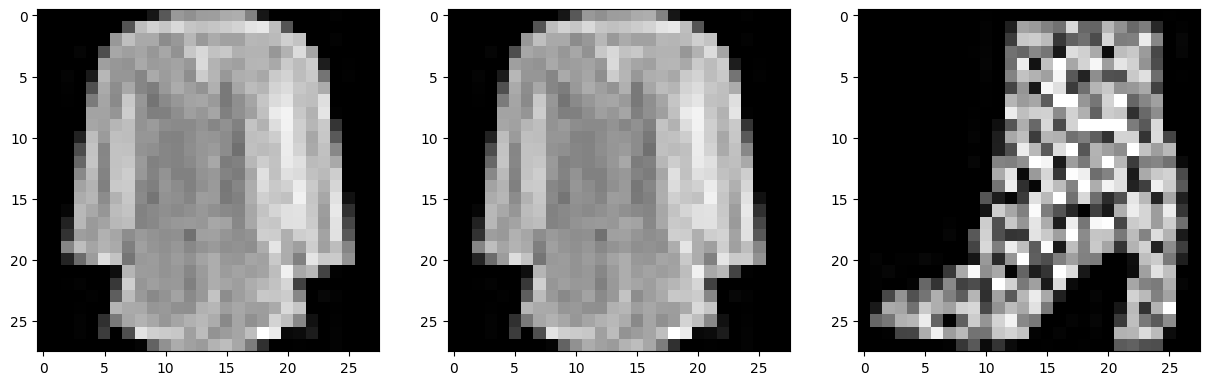

In [ ]:
plot_images([images[0],images[0],images[1]])

# Experiment 1

In [ ]:
img1 = randimg()
img2=randimg()



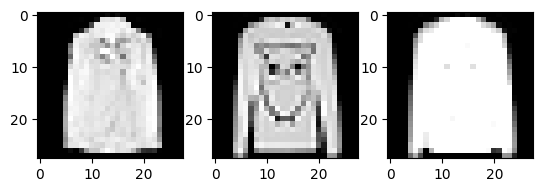

In [ ]:
plot_images([img1,img2,np.minimum(img1+img2,255)])

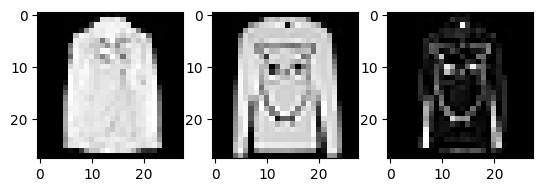

In [ ]:
plot_images([img1,img2,np.maximum(img1-img2,0)])

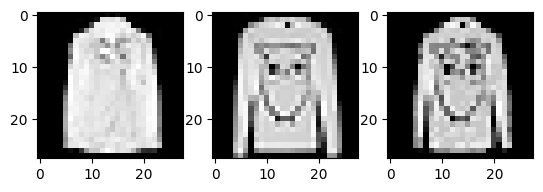

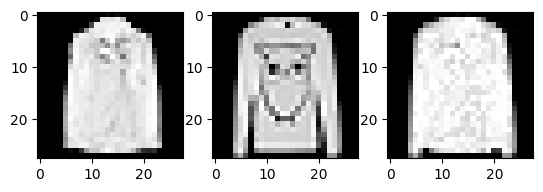

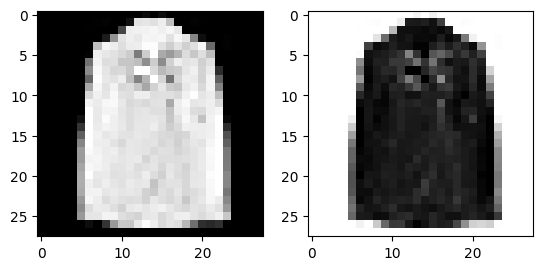

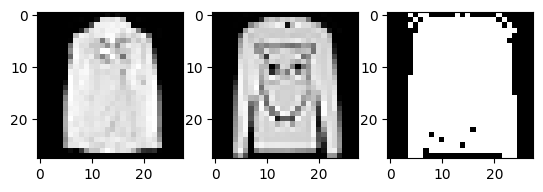

In [ ]:
plot_images([img1,img2,(img1 & img2)])
plot_images([img1,img2,(img1 | img2)])
def negimg(img):
  return img.max()-img
plot_images([img1,negimg(img1)])

def xor_img(img1,img2):
    assert img1.shape==img2.shape
    xor_img= np.zeros_like(img1)
    for i in range(img1.shape[0]):
      for j in range(img1.shape[1]):
        xor_img[i,j]= 1 if img1[i,j]!=img2[i,j] else 0
    return xor_img
plot_images([img1,img2,xor_img(img1,img2)])

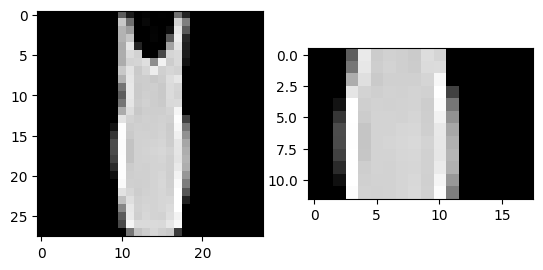

In [ ]:
plot_images([img1,img1[10:22,7:25]])

#Exp 2

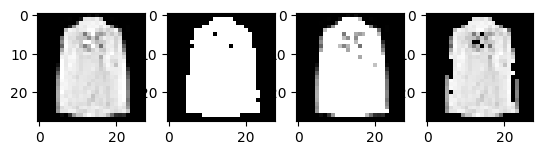

In [ ]:
def threshold(img,threshold):
  return np.where(img>threshold,255,0)
def gray_level_slicing(img,low,high,bg=False):
  img3=np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i,j] in range(low-1,high+1):
        img3[i,j]=255
      else:
        if bg:
          img3[i,j]=img[i,j]
        else:
          img3[i,j]=0
  return img3


def remove_bg_slice(img,low,high):
  img3=np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i,j] in range(low-1,high+1):
        img3[i,j]=img[i,j]

      else:
        img3[i,j]=0
  return img3




plot_images([img1,threshold(img1,127),gray_level_slicing(img1,197,255,bg=True),remove_bg_slice(img1,100,254)])


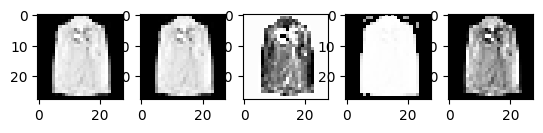

In [ ]:
def contrast_stretching(img):
  img3=np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img3[i,j]=(img[i,j]-img.min())/(img.max()-img.min())*255
  return img3

def contrast_stretching_line(img,s1,r1,s2,r2):
  """
  img3[i,j] = (shigh-slow)/(rhigh-rlow)*(img[i,j]-rlow)+slow
  """
  img3=np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i,j] in range(r1):
        img3[i,j]=s1/r1*img[i,j]
      elif img[i,j] in range(r1,r2):
        img3[i,j]= (s2-s1)/(r2-r1)*(img[i,j]-r1)+s1
      else:
        img3[i,j]=((255-s2)/255-r2)*(img[i,j]-r2)+s2
  return img3

def log_transformation(img,c=1):
  return c*np.log(img+1e-4)

def power_transformation(img,gamma=0.5):
  return np.power(img,gamma)

plot_images([img1,contrast_stretching(img1),contrast_stretching_line(img1,100,120,170,200),log_transformation(img1),power_transformation(img1,4)])


# Exp 4

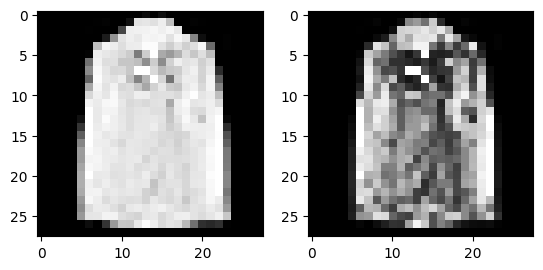

In [ ]:
def get_pxl_freq(img):
  freq=np.zeros(img.max()+1)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      freq[img[i,j]]+=1
  return freq

def get_pxl_map(img):
  pxl_freq=get_pxl_freq(img)
  pxl_pdf = pxl_freq/np.sum(pxl_freq)
  pxl_cdf=pxl_pdf.cumsum()
  pxl_cdf=img.max()*pxl_cdf
  pxl_cdf=np.fix(pxl_cdf)
  pxl_map=np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      pxl_map[i,j]=pxl_cdf[img[i,j]]
  return pxl_cdf


def hist_equalization(img):
  img3=np.zeros_like(img)
  pxl_map=get_pxl_map(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img3[i,j]=pxl_map[img[i,j]]
  return img3


plot_images([img1,hist_equalization(img1)])




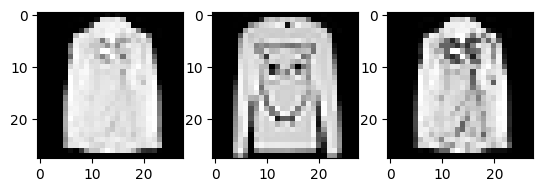

In [ ]:
def histograme_matching(img1,img2):
  img3=np.zeros_like(img1)
  pxl_map1=get_pxl_map(img2)

  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      img3[i,j]=pxl_map1[img1[i,j]]
  return img3
plot_images([img1,img2,histograme_matching(img1,img2)])

## Add Gauss Noise

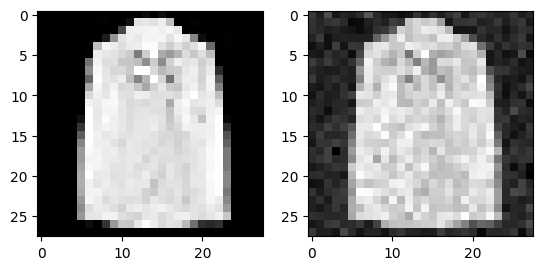

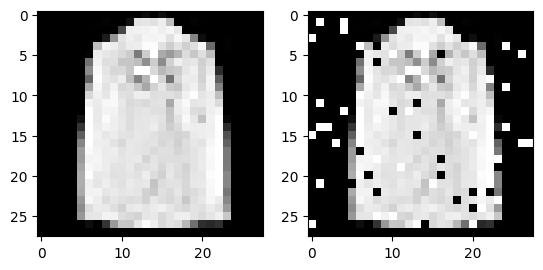

In [ ]:
def add_gauss_noise(img,mean=0,std=1):
  img3=np.zeros_like(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img3[i,j]=img[i,j]+np.random.normal(mean,std)
  return img3




def add_salt_pepper_noise(img,prob_s=0.05,prob_p=0.05):
  # img3=np.zeros_like(img)
  img3=img.copy()
  num_pxl=img.shape[0]*img.shape[1]
  num_salt=int(prob_s*num_pxl)
  num_pepper=int(prob_p*num_pxl)
  for i in range(num_salt):
    img3[np.random.randint(0,img.shape[0]),np.random.randint(0,img.shape[1])]=255
  for i in range(num_pepper):
    img3[np.random.randint(0,img.shape[0]),np.random.randint(0,img.shape[1])]=0
  return img3
plot_images([img1,add_gauss_noise(img1,std=20)])

plot_images([img1,add_salt_pepper_noise(img1,prob_s=0.05,prob_p=0.05)])

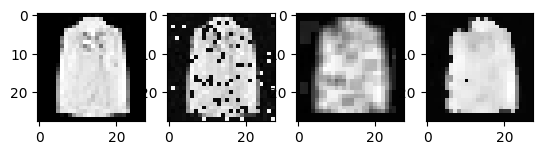

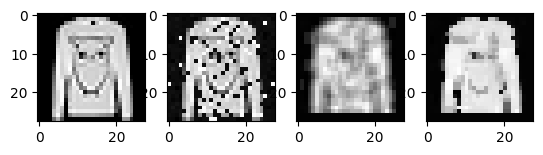

In [ ]:
def mean_filter(img):
  img3=np.zeros_like(img)
  for i in range(1,img.shape[0]-2):
    for j in range(1,img.shape[1]-2):
      img3[i,j] = np.mean(img[i-1:i+2,j-1:j+2])
  return img3

def median_filter(img):
  img3=np.zeros_like(img)
  for i in range(1,img.shape[0]-2):
    for j in range(1,img.shape[1]-2):
      img3[i,j] = np.median(img[i-1:i+2,j-1:j+2])
  return img3

ruined=add_gauss_noise(img1,std=5)
ruined = add_salt_pepper_noise(ruined,prob_s=0.05,prob_p=0.15)

plot_images([img1,ruined,mean_filter(ruined),median_filter(ruined)])
ruined=add_gauss_noise(img2,std=5)
ruined = add_salt_pepper_noise(ruined,prob_s=0.05,prob_p=0.15)
plot_images([img2,ruined,mean_filter(ruined),median_filter(ruined)])

In [ ]:
i=3
j=26

np.sum(img1[i-1:i+2,j-1:j+2]*ex_kernel)

ValueError: operands could not be broadcast together with shapes (3,2) (3,3) 

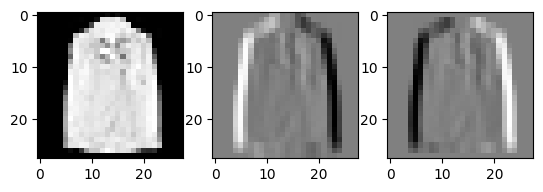

In [ ]:
from scipy.ndimage import convolve


def mconvolve(img,kernel):
  img3 = np.zeros_like(img)
  for i in range(1,img.shape[0]-kernel.shape[0]+2):
    for j in range(1,img.shape[1]-kernel.shape[1]+2):
      img3[i,j] = np.sum((img[i-1:i+kernel.shape[0]-1,j-1:j+kernel.shape[1]-1])*kernel)
  return img3

ex_kernel=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])


plot_images([img1,convolve(img1,ex_kernel),mconvolve(img1,ex_kernel)])

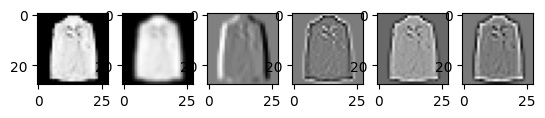

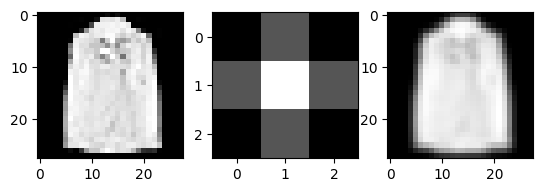

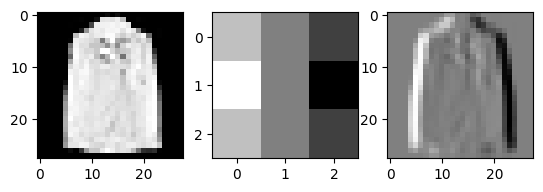

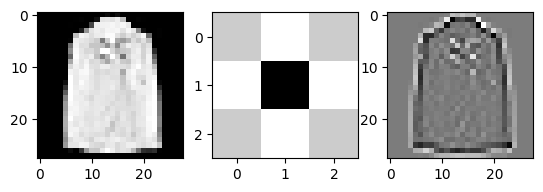

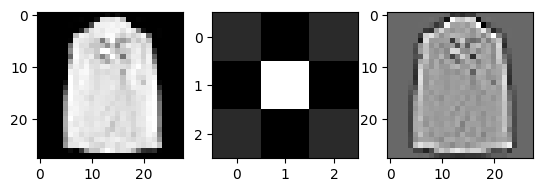

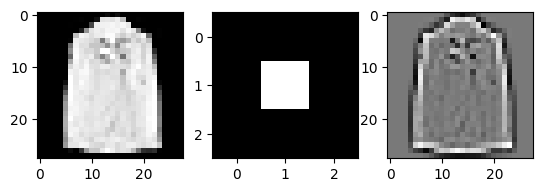

In [ ]:
gauss_filter=np.array(
    [
     [1,2,1],
     [2,4,2],
     [1,2,1]

    ]

          )/16

sobel_filter=np.array(
    [
     [1,0,-1],
     [2,0,-2],
     [1,0,-1]

    ]

          )

laplacian_filter=np.array(
    [
     [0,1,0],
     [1,-4,1],
     [0,1,0]

    ]

          )
sharpen_filter=np.array(
    [
     [0,-1,0],
     [-1,5,-1],
     [0,-1,0]

    ]

          )
edge_filter=np.array(
    [
     [-1,-1,-1],
     [-1,8,-1],
     [-1,-1,-1]

    ]

          )

filters=[gauss_filter,sobel_filter,laplacian_filter,sharpen_filter,edge_filter]


plot_images([img1]+[convolve(img1,kernel) for kernel in filters])
for kernel in filters:
  plot_images([img1,kernel,convolve(img1,kernel)])

Experiment 5

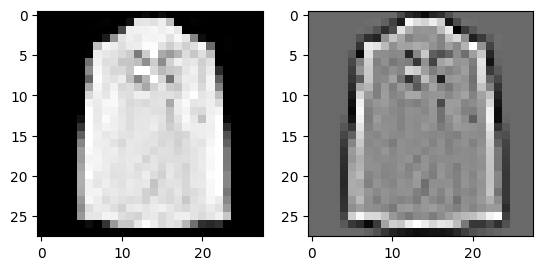

In [ ]:
low_pass_filter=np.array(
    [
        [1,1,1],[1,1,1],[1,1,1]

    ]
)/9




high_pass_filter=edge_filter.copy()


def high_boost_img(img,alpha=1):
  lowPassImage=convolve(img,low_pass_filter)
  return img + alpha*(img-lowPassImage)



plot_images([img1,high_boost_img(img1,alpha=8)])

# Exp 6

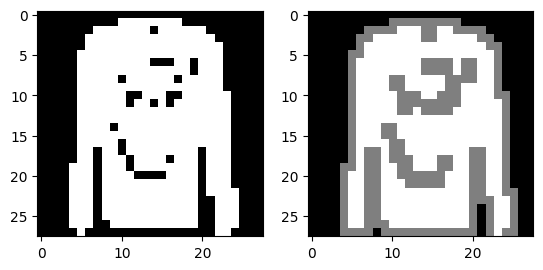

In [ ]:
def run_se(img,se):
  img3=np.zeros_like(img,dtype=float)

  temp_img = mconvolve(np.pad(img,1),se)
  for i in range(1,temp_img.shape[0]-1):
    for j in range(1,temp_img.shape[1]-1):
      if np.isclose(temp_img[i,j],se.sum()):
        img3[i-1,j-1]=255
      elif temp_img[i,j]==0:
        img3[i-1,j-1]=0
      else:
        img3[i-1,j-1]=127
  return img3

img_bin = threshold(img2,127)/255
plot_images([img_bin,run_se(img_bin,np.array([[1,1,0],[1,1,0],[0,0,0]]))])

In [ ]:
np.unique(mconvolve(np.pad(img_morph,1),se))

array([0, 1, 2])

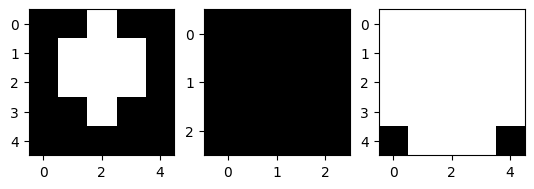

In [ ]:
img_morph=np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0]
])

se=np.array([[1,1,1],[1,1,1],[1,1,1]])

plot_images([img_morph,se,run_se(img_morph,se)])

In [ ]:
img_morph*se

ValueError: operands could not be broadcast together with shapes (5,5) (3,3) 

In [ ]:
run_se(img_morph,se)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
def erosion(img,se):
  return threshold(run_se(img,se),200)

def dilation(img,se):

  return threshold(run_se(img,se),1)

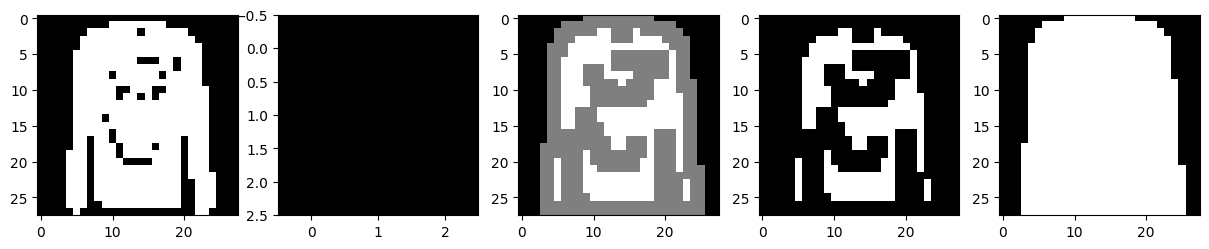

In [ ]:
plot_images([img_bin,se,run_se(img_bin,se),erosion(img_bin,se),dilation(img_bin,se)])

In [ ]:
def opening(img,se):
  return dilation(erosion(img,se)/255,se)
def closing(img,se):
  return erosion(dilation(img,se)/255,se)

def hit_or_miss(img,se):
  return np.minimum(erosion(img,se) , erosion(negimg(img),negimg(se)))

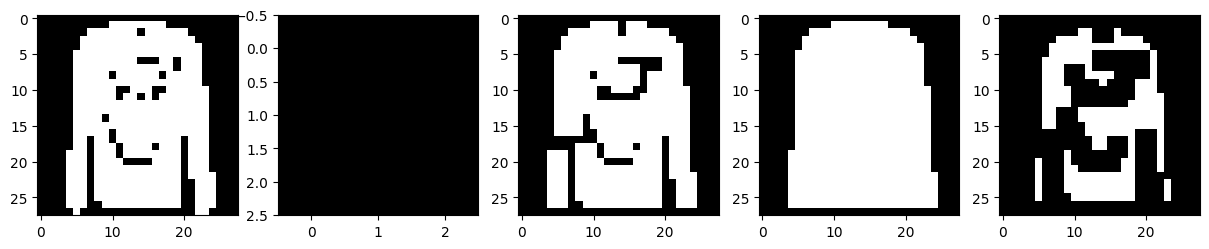

In [ ]:
plot_images([img_bin,se,opening(img_bin,se),closing(img_bin,se),hit_or_miss(img_bin,se)])

# Experiment 9

In [ ]:
from queue import Queue

def region_growing(img,seed,threshold):
  img3=np.zeros_like(img)

  neighbours=[
      (-1,-1),(-1,0),(-1,1),
      (0,-1),(0,1),
      (1,-1),(1,0),(1,1)
  ]

  queue=Queue()
  queue.put(seed)
  visited=np.zeros_like(img)
  visited[seed]=1
  img3[seed]=255
  while not queue.empty():
    i,j=queue.get()
    for neighbour in neighbours:

      di,dj=neighbour
      if i+di in range(img.shape[0]) and j+dj in range(img.shape[1]) and not visited[i+di,j+dj]:
        if np.abs(img[i+di,j+dj]-img[i,j])<threshold:
          queue.put((i+di,j+dj))
          visited[i+di,j+dj]=1
          img3[i+di,j+dj]=255
  return img3

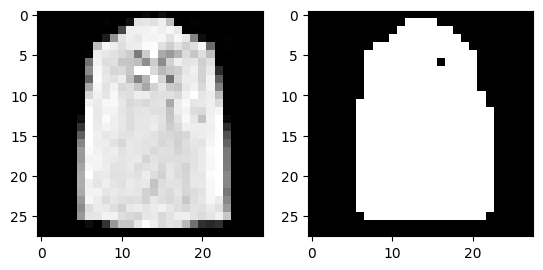

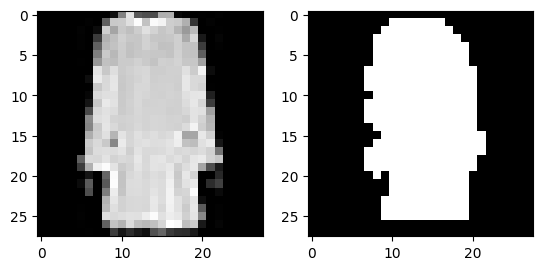

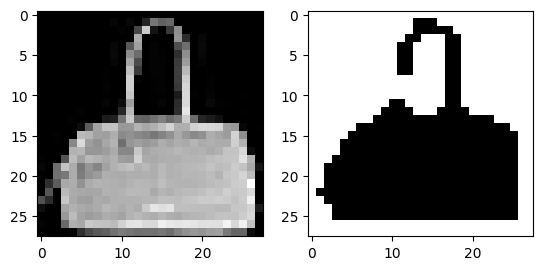

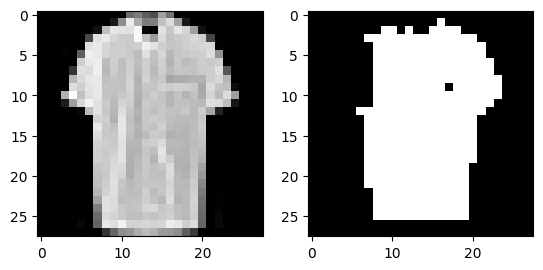

In [ ]:
plot_images([img1,region_growing(median_filter(img1),(10,10),10)])

for i in range(3):
  ran_ind=random.randint(0,len(images))

  plot_images([images[ran_ind],region_growing(median_filter(images[ran_ind]),(10,10),10)])

# Experiment 8

In [ ]:
def apply_filter(image, kernel):
  kernelh, kernelw = kernel.shape
  n, m = image.shape
  new_image = image.copy()

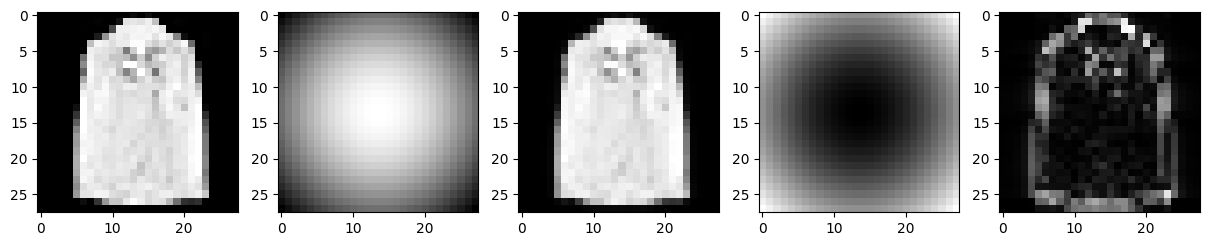

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform(img):

    f_transform = np.fft.fft2(img)  # 2D Fourier Transform
    f_shift = np.fft.fftshift(f_transform)  # Shift low frequencies to the center
    return f_shift

def inverse_fourier_transform(f_transform):
    f_ishift = np.fft.ifftshift(f_transform)  # Shift frequencies back
    img_reconstructed = np.abs(np.fft.ifft2(f_ishift))  # Inverse 2D Fourier Transform
    return img_reconstructed

def gaussian_filter(shape, sigma, high_pass=False):
    h, w = shape
    y, x = np.meshgrid(np.linspace(-h//2, h//2, h), np.linspace(-w//2, w//2, w), indexing="ij")
    d2 = x**2 + y**2
    gaussian = np.exp(-d2 / (2 * sigma**2))
    if high_pass:
        return 1 - gaussian
    return gaussian

def apply_filter_in_freq_domain(img, filter_function, **filter_params):

    f_transform = fourier_transform(img)

    filter_mask = filter_function(img.shape, **filter_params)

    filtered_transform = f_transform * filter_mask

    return inverse_fourier_transform(filtered_transform), filter_mask




filtered_low, low_pass_filter = apply_filter_in_freq_domain(img1, gaussian_filter, sigma=20, high_pass=False)

filtered_high, high_pass_filter = apply_filter_in_freq_domain(img1, gaussian_filter, sigma=20, high_pass=True)

plot_images(
    [img1, low_pass_filter, filtered_low, high_pass_filter, filtered_high],
)
